In [1]:
import json
import requests
import pandas as pd

In [2]:
# 结合网址去查看
zcfz_name2code_dict = {
    '股票代码': 'SECUCODE'
    ,'股票简称': 'SECURITY_NAME_ABBR'
    ,'行业名称': 'INDUSTRY_NAME'
    ,'公告日期': 'REPORT_DATE'
    ,'总资产': 'TOTAL_ASSETS'
    ,'固定资产': 'FIXED_ASSET'
    ,'货币资金': 'MONETARYFUNDS'
    ,'应收账款': 'ACCOUNTS_RECE'
    ,'存货': 'INVENTORY'
    ,'总负债': 'TOTAL_LIABILITIES'
    ,'应付账款': 'ACCOUNTS_PAYABLE'
    ,'预收账款': 'ADVANCE_RECEIVABLES'
    ,'所有者权益': 'TOTAL_EQUITY'
}
zcfz_code2name_dict = {v:k for k,v in zcfz_name2code_dict.items()}

In [3]:
# 结合网址去查看
lrb_name2code_dict = {
    '股票代码': 'SECUCODE'
    ,'股票简称': 'SECURITY_NAME_ABBR'
    ,'行业名称': 'INDUSTRY_NAME'
    ,'公告日期': 'REPORT_DATE'
    ,'营业收入': 'TOTAL_OPERATE_INCOME'
    ,'营业成本': 'OPERATE_COST'
    ,'销售费用': 'SALE_EXPENSE'
    ,'管理费用': 'MANAGE_EXPENSE'
    ,'财务费用': 'FINANCE_EXPENSE'
    ,'营业总支出': 'TOTAL_OPERATE_COST'
    ,'营业利润': 'OPERATE_PROFIT'
    ,'利润总额': 'TOTAL_PROFIT'
    ,'所得税费用': 'INCOME_TAX'
    ,'净利润': 'OPERATE_INCOME'
}
lrb_code2name_dict = {v:k for k,v in lrb_name2code_dict.items()}

In [4]:
report_date_list = ['2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31']
pageSize = 500
pageNumber_list = range(20) # 不会超过20了

In [5]:
def get_zcfz_df_v2(api, code2name_dict):
    res = json.loads(requests.get(api).text)['result']
    if res==None:  # 如果为空就不解析了
        return pd.DataFrame([])
    zcfz_df = pd.DataFrame(res['data'])
    zcfz_df = zcfz_df.loc[:, code2name_dict]
    zcfz_df = zcfz_df.rename(columns=code2name_dict)
    return zcfz_df

In [6]:
def get_lrb_df_v2(api, code2name_dict):
    res = json.loads(requests.get(api).text)['result']
    if res==None:  # 如果为空就不解析了
        return pd.DataFrame([])        
    lrb_df = pd.DataFrame(res['data'])
    lrb_df = lrb_df.loc[:, code2name_dict]
    lrb_df = lrb_df.rename(columns=code2name_dict)
    return lrb_df

In [7]:
total_zcfz_df = pd.DataFrame([])
for REPORT_DATE in report_date_list:
    print('开始获取', REPORT_DATE)
    for pageNumber in pageNumber_list:
            zcfz_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?&sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
    f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_BALANCE&columns=ALL&filter=(SECURITY_TYPE_CODE+in+("058001001"%2C"058001008"))(TRADE_MARKET_CODE!%3D"069001017")'\
    f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
            tmp_zcfz_df = get_zcfz_df_v2(zcfz_api, code2name_dict=zcfz_code2name_dict)
            if tmp_zcfz_df.shape[0] == 0:
                break
            else:
                if total_zcfz_df.shape[0] == 0:
                    total_zcfz_df = tmp_zcfz_df
                else:
                    total_zcfz_df = pd.concat([total_zcfz_df, tmp_zcfz_df], axis=0)

开始获取 2017-12-31
开始获取 2018-12-31
开始获取 2019-12-31
开始获取 2020-12-31
开始获取 2021-12-31
开始获取 2022-12-31


In [8]:
total_zcfz_df.shape

(32790, 13)

In [9]:
total_lrb_df = pd.DataFrame([])
for REPORT_DATE in report_date_list:
    print('开始获取', REPORT_DATE)
    for pageNumber in pageNumber_list:
            lrb_api = f'https://datacenter-web.eastmoney.com/api/data/v1/get?sortColumns=NOTICE_DATE%2CSECURITY_CODE&sortTypes=-1%2C-1&'\
f'pageSize={pageSize}&pageNumber={pageNumber}&reportName=RPT_DMSK_FN_INCOME&columns=ALL&filter=(SECURITY_TYPE_CODE+in+(%22058001001%22%2C%22058001008%22))(TRADE_MARKET_CODE!%3D%22069001017%22)'\
f'(REPORT_DATE%3D%27{REPORT_DATE}%27)'
            tmp_lrb_df = get_lrb_df_v2(lrb_api, code2name_dict=lrb_code2name_dict)
            if tmp_lrb_df.shape[0] == 0:
                break
            else:
                if tmp_lrb_df.shape[0] == 0:
                    total_lrb_df = tmp_lrb_df
                else:
                    total_lrb_df = pd.concat([total_lrb_df, tmp_lrb_df], axis=0)

开始获取 2017-12-31
开始获取 2018-12-31
开始获取 2019-12-31
开始获取 2020-12-31
开始获取 2021-12-31
开始获取 2022-12-31


In [10]:
total_lrb_df.shape

(32789, 14)

In [11]:
total_zcfz_df

,股票代码,股票简称,行业名称,公告日期,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
0,600748.SH,上实发展,房地产开发,2017-12-31 00:00:00,3.867058e+10,9.757817e+07,9.410630e+09,1.376726e+09,1.940552e+10,2.762549e+10,1.149032e+09,8.353998e+09,1.104510e+10
1,600382.SH,ST广珠,钢铁行业,2017-12-31 00:00:00,6.677762e+09,5.396651e+07,1.320629e+08,3.778326e+07,8.409527e+06,1.216221e+09,1.813194e+07,2.995662e+05,5.461541e+09
2,002197.SZ,证通电子,计算机设备,2017-12-31 00:00:00,5.321186e+09,8.512267e+08,4.209473e+08,1.148234e+09,3.139073e+08,2.512209e+09,5.150043e+08,1.845710e+07,2.808977e+09
3,002086.SZ,*ST东洋,农牧饲渔,2017-12-31 00:00:00,4.047613e+09,1.363089e+09,4.472354e+08,3.088070e+08,1.065370e+09,1.048368e+09,6.313936e+07,9.959575e+06,2.999245e+09
4,002491.SZ,通鼎互联,通信设备,2017-12-31 00:00:00,8.651206e+09,1.487967e+09,1.152587e+09,1.722675e+09,1.087123e+09,4.003667e+09,4.577488e+08,4.282542e+07,4.647539e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,002772.SZ,众兴菌业,农牧饲渔,2022-12-31 00:00:00,6.569141e+09,2.317383e+09,1.326172e+09,3.620411e+07,1.255494e+09,3.184470e+09,2.054031e+08,NaN,3.384672e+09
0,688700.SH,东威科技,专用设备,2022-12-31 00:00:00,1.767689e+09,1.538999e+08,1.694091e+08,5.555564e+08,3.740943e+08,8.297525e+08,2.480067e+08,NaN,9.379365e+08
1,600557.SH,康缘药业,中药,2022-12-31 00:00:00,6.795804e+09,2.409275e+09,1.601300e+09,7.282228e+08,3.428201e+08,1.861812e+09,3.615039e+08,NaN,4.933993e+09
2,600313.SH,农发种业,农牧饲渔,2022-12-31 00:00:00,4.004510e+09,6.127239e+08,8.199594e+08,2.482930e+08,8.741548e+08,1.422201e+09,1.973058e+08,5.668051e+06,2.582309e+09


In [12]:
total_lrb_df

,股票代码,股票简称,行业名称,公告日期,营业收入,营业成本,销售费用,管理费用,财务费用,营业总支出,营业利润,利润总额,所得税费用,净利润
0,600748.SH,上实发展,房地产开发,2017-12-31 00:00:00,6.651074e+09,4.472650e+09,2.193115e+08,2.692916e+08,2.195052e+08,6.212075e+09,8.080888e+08,8.383940e+08,2.875447e+08,NaN
1,600382.SH,ST广珠,钢铁行业,2017-12-31 00:00:00,6.409023e+08,1.014378e+08,NaN,2.016048e+07,2.339154e+07,1.480336e+08,5.240448e+08,5.244366e+08,1.252122e+08,NaN
2,002197.SZ,证通电子,计算机设备,2017-12-31 00:00:00,1.664952e+09,1.232189e+09,1.377960e+08,8.313655e+07,3.647867e+07,1.643465e+09,2.822650e+07,3.176976e+07,7.429574e+06,NaN
3,002086.SZ,*ST东洋,农牧饲渔,2017-12-31 00:00:00,7.794073e+08,5.749957e+08,1.639303e+07,7.702049e+07,3.146910e+07,7.191002e+08,1.303220e+08,1.302089e+08,8.890130e+06,NaN
4,002491.SZ,通鼎互联,通信设备,2017-12-31 00:00:00,4.213584e+09,2.928223e+09,1.912179e+08,1.609071e+08,1.219589e+08,3.664110e+09,6.797594e+08,6.752554e+08,7.495441e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,301076.SZ,新瀚新材,化学原料,2022-12-31 00:00:00,3.980881e+08,2.543197e+08,3.289836e+06,2.701933e+07,-7.597897e+06,2.919234e+08,1.232429e+08,1.229454e+08,1.599847e+07,NaN
0,002072.SZ,凯瑞德,软件开发,2022-12-31 00:00:00,3.591281e+08,3.479665e+08,7.739690e+06,1.074060e+07,5.543897e+04,3.672770e+08,-1.041543e+07,-1.028766e+07,8.787500e+04,None
1,603162.SH,海通发展,航运港口,2022-12-31 00:00:00,2.046033e+09,1.232539e+09,2.994100e+07,3.488407e+07,3.816629e+07,1.338930e+09,7.065845e+08,7.050855e+08,3.366847e+07,None
2,000815.SZ,美利云,造纸印刷,2022-12-31 00:00:00,1.100444e+09,1.074051e+09,1.149044e+07,6.290792e+07,1.759673e+07,1.207069e+09,-2.153726e+08,-2.237144e+08,7.781686e+06,None


In [13]:
total_zcfz_df_index = total_zcfz_df.set_index(['公告日期', '股票代码'])
total_zcfz_df_index.head()

股票简称   行业名称           总资产          固定资产  \
公告日期                股票代码                                                  
2017-12-31 00:00:00 600748.SH   上实发展  房地产开发  3.867058e+10  9.757817e+07   
                    600382.SH   ST广珠   钢铁行业  6.677762e+09  5.396651e+07   
                    002197.SZ   证通电子  计算机设备  5.321186e+09  8.512267e+08   
                    002086.SZ  *ST东洋   农牧饲渔  4.047613e+09  1.363089e+09   
                    002491.SZ   通鼎互联   通信设备  8.651206e+09  1.487967e+09   

                                       货币资金          应收账款            存货  \
公告日期                股票代码                                                  
2017-12-31 00:00:00 600748.SH  9.410630e+09  1.376726e+09  1.940552e+10   
                    600382.SH  1.320629e+08  3.778326e+07  8.409527e+06   
                    002197.SZ  4.209473e+08  1.148234e+09  3.139073e+08   
                    002086.SZ  4.472354e+08  3.088070e+08  1.065370e+09   
                    002491.SZ  1.152587e+09  1.722675e+09  1.087123e+09   

                                        总负债          应付账款          预收账款  \
公告日期                股票代码                                                  
2017-12-31 00:00:00 600748.SH  2.762549e+10  1.149032e+09  8.353998e+09   
                    600382.SH  1.216221e+09  1.813194e+07  2.995662e+05   
                    002197.SZ  2.512209e+09  5.150043e+08  1.845710e+07   
                    002086.SZ  1.048368e+09  6.313936e+07  9.959575e+06   
                    002491.SZ  4.003667e+09  4.577488e+08  4.282542e+07   

                                      所有者权益  
公告日期                股票代码                     
2017-12-31 00:00:00 600748.SH  1.104510e+10  
                    600382.SH  5.461541e+09  
                    002197.SZ  2.808977e+09  
                    002086.SZ  2.999245e+09  
                    002491.SZ  4.647539e+09

In [14]:
total_zcfz_df = total_zcfz_df_index.reset_index()

In [15]:
total_zcfz_df_index = total_zcfz_df.set_index(['公告日期', '股票代码'])
total_lrb_df_index = total_lrb_df.set_index(['公告日期', '股票代码'])
total_zcfz_df_index.loc['2022-12-31 00:00:00']

,股票简称,行业名称,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
股票代码,,,,,,,,,,,
301232.SZ,飞沃科技,None,1.841895e+09,2.592411e+08,1.519321e+08,7.009848e+08,3.055989e+08,1.162222e+09,2.624865e+08,83302.13,6.796730e+08
000782.SZ,美达股份,化纤行业,3.147875e+09,5.961282e+08,4.884300e+08,1.330246e+08,4.475507e+08,1.728367e+09,2.453489e+08,NaN,1.419508e+09
301337.SZ,亚华电子,软件开发,4.873380e+08,6.367987e+07,1.056146e+08,1.634677e+08,9.133210e+07,1.373008e+08,4.814058e+07,NaN,3.500371e+08
001207.SZ,联科科技,橡胶制品,1.945228e+09,5.021152e+08,5.405031e+08,3.217202e+08,1.570523e+08,5.900174e+08,1.556136e+08,NaN,1.355211e+09
688562.SH,航天软件,互联网服务,3.016979e+09,2.285731e+08,9.314463e+08,3.515910e+08,1.157395e+09,2.407465e+09,6.919938e+08,NaN,6.095143e+08
...,...,...,...,...,...,...,...,...,...,...,...
002772.SZ,众兴菌业,农牧饲渔,6.569141e+09,2.317383e+09,1.326172e+09,3.620411e+07,1.255494e+09,3.184470e+09,2.054031e+08,NaN,3.384672e+09
688700.SH,东威科技,专用设备,1.767689e+09,1.538999e+08,1.694091e+08,5.555564e+08,3.740943e+08,8.297525e+08,2.480067e+08,NaN,9.379365e+08
600557.SH,康缘药业,中药,6.795804e+09,2.409275e+09,1.601300e+09,7.282228e+08,3.428201e+08,1.861812e+09,3.615039e+08,NaN,4.933993e+09


In [16]:
total_zcfz_df_index.swaplevel().loc['002396.SZ']

,股票简称,行业名称,总资产,固定资产,货币资金,应收账款,存货,总负债,应付账款,预收账款,所有者权益
公告日期,,,,,,,,,,,
2017-12-31 00:00:00,星网锐捷,通信设备,6.439913e+09,4.844548e+08,1.731688e+09,1.521677e+09,1.362966e+09,2.690476e+09,9.378150e+08,6.744459e+07,3.749436e+09
2017-12-31 00:00:00,星网锐捷,通信设备,6.439913e+09,4.844548e+08,1.731688e+09,1.521677e+09,1.362966e+09,2.690476e+09,9.378150e+08,6.744459e+07,3.749436e+09
2018-12-31 00:00:00,星网锐捷,通信设备,6.999109e+09,5.647691e+08,1.633702e+09,1.732376e+09,1.542495e+09,2.734762e+09,1.069377e+09,8.334161e+07,4.264346e+09
2018-12-31 00:00:00,星网锐捷,通信设备,6.999109e+09,5.647691e+08,1.633702e+09,1.732376e+09,1.542495e+09,2.734762e+09,1.069377e+09,8.334161e+07,4.264346e+09
2019-12-31 00:00:00,星网锐捷,通信设备,7.650634e+09,5.540331e+08,2.054035e+09,1.831114e+09,1.649794e+09,2.814118e+09,1.175606e+09,1.201577e+08,4.836516e+09
2019-12-31 00:00:00,星网锐捷,通信设备,7.650634e+09,5.540331e+08,2.054035e+09,1.831114e+09,1.649794e+09,2.814118e+09,1.175606e+09,1.201577e+08,4.836516e+09
2020-12-31 00:00:00,星网锐捷,通信设备,8.715630e+09,7.316542e+08,2.101200e+09,1.685647e+09,2.323741e+09,3.833001e+09,1.271083e+09,NaN,4.882629e+09
2020-12-31 00:00:00,星网锐捷,通信设备,8.715630e+09,7.316542e+08,2.101200e+09,1.685647e+09,2.323741e+09,3.833001e+09,1.271083e+09,NaN,4.882629e+09
2021-12-31 00:00:00,星网锐捷,通信设备,1.112296e+10,8.025267e+08,2.141405e+09,1.758021e+09,4.038957e+09,5.470682e+09,1.840501e+09,NaN,5.652276e+09


In [17]:
total_zcfz_df_index['总资产'].drop_duplicates()
total_zcfz_df_index['总资产'].reset_index().drop_duplicates(subset=['公告日期', '股票代码'])

,公告日期,股票代码,总资产
0,2017-12-31 00:00:00,600748.SH,3.867058e+10
1,2017-12-31 00:00:00,600382.SH,6.677762e+09
2,2017-12-31 00:00:00,002197.SZ,5.321186e+09
3,2017-12-31 00:00:00,002086.SZ,4.047613e+09
4,2017-12-31 00:00:00,002491.SZ,8.651206e+09
...,...,...,...
32785,2022-12-31 00:00:00,002772.SZ,6.569141e+09
32786,2022-12-31 00:00:00,688700.SH,1.767689e+09
32787,2022-12-31 00:00:00,600557.SH,6.795804e+09
32788,2022-12-31 00:00:00,600313.SH,4.004510e+09


In [18]:
total_zcfz_df_index_dropdu = total_zcfz_df_index.drop_duplicates()
total_zcfz_df_index_dropdu.shape

(29790, 11)

In [19]:
total_lrb_df_index_dropdu = total_lrb_df_index.drop_duplicates()
total_lrb_df_index_dropdu.shape

(29789, 12)

In [20]:
total_zcfz_df_index_dropdu['总资产'].unstack('股票代码').shift(1).stack('股票代码')
total_zcfz_df_index_dropdu['同期资产'] = total_zcfz_df_index_dropdu['总资产'].unstack('股票代码').shift(1).stack('股票代码')
total_zcfz_df_index_dropdu['同期权益'] = total_zcfz_df_index_dropdu['所有者权益'].unstack('股票代码').shift(1).stack('股票代码')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
total_lrb_df_index_dropdu['净利润'].isnull().sum()

29501

In [22]:
total_lrb_df_index_dropdu['净利润'] = total_lrb_df_index_dropdu['利润总额'] - total_lrb_df_index_dropdu['所得税费用']

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
total_lrb_df_index_dropdu['净利润'].isnull().sum()

293

In [24]:
total_df = pd.concat([total_zcfz_df_index_dropdu, total_lrb_df_index_dropdu], axis=1)

In [25]:
total_df['净资产收益率'] = total_df['净利润'] / (total_df['所有者权益'] + total_df['同期权益']) * 2
total_df['利润率'] = total_df['净利润'] / total_df['营业收入']
total_df['资产周转率'] = total_df['营业收入'] / (total_df['总资产'] + total_df['同期资产']) * 2
total_df['权益乘数'] = total_df['总资产'] / total_df['所有者权益']

In [26]:
analysis_df = total_df.loc['2021-12-31 00:00:00']
analysis_df['净资产收益率'].isnull().sum()

41

In [27]:
analysis_df.loc[:, ['净资产收益率', '利润率', '资产周转率', '权益乘数']].describe() 

,净资产收益率,利润率,资产周转率,权益乘数
count,4974.000000,4974.000000,5014.000000,5015.000000
mean,0.037441,-10.276560,0.670333,2.315654
std,1.608183,728.185646,0.553922,7.308184
min,-71.366817,-51356.378095,0.000000,-367.604858
25%,0.031554,0.026617,0.368189,1.338647
50%,0.087124,0.083517,0.570550,1.689338
75%,0.147909,0.159470,0.823175,2.299487
max,24.264648,16.741226,11.452938,276.340096


In [28]:
analysis_df.drop(columns='行业名称').columns
hymc = analysis_df['行业名称'].iloc[:, 0].copy()
analysis_df = analysis_df.drop(columns='行业名称')
analysis_df['行业名称'] = hymc

In [29]:
industry_df = analysis_df.groupby('行业名称').agg({
    '净资产收益率': 'mean',
    '利润率': 'mean',            
    '资产周转率': 'mean',  
    '权益乘数': 'mean',  
                                     })

In [30]:
#设置显示全部行，不省略
pd.set_option('display.max_rows',None)
#设置显示全部列，不省略
pd.set_option('display.max_columns',None)

col = '净资产收益率'
industry_df.sort_values(by=col)

,净资产收益率,利润率,资产周转率,权益乘数
行业名称,,,,
医疗服务,-1.568502,0.093472,0.570334,3.248788
珠宝首饰,-1.334734,-0.825806,1.255801,3.936693
电子元件,-0.462707,0.117456,0.763931,1.598190
中药,-0.407966,0.044427,0.564777,1.525297
房地产服务,-0.394806,0.000094,0.551873,2.989215
装修装饰,-0.178930,-0.137144,0.627462,3.048455
教育,-0.127943,-0.518485,0.387810,7.300762
通信服务,-0.110958,-0.182416,0.576834,2.033475
仪器仪表,-0.106646,0.166461,0.526867,1.256721


In [31]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 汽车行业与净资产收益率最高的compare_num-1个行业的比较
# 比较的行业数量：
compare_num = 20
compare_data = pd.concat([pd.DataFrame(industry_df.loc["汽车整车"]).T,industry_df.drop("汽车整车").sort_values(by=col).tail(compare_num-1)])
compare_data

,净资产收益率,利润率,资产周转率,权益乘数
汽车整车,0.073824,-0.053234,0.716960,4.468725
电池,0.115558,0.071066,0.765778,2.228677
多元金融,0.120611,-0.650161,0.185328,4.374767
消费电子,0.124173,0.034899,0.899556,2.012279
酿酒行业,0.127350,0.101639,0.512236,1.694832
有色金属,0.130816,0.061354,1.233847,2.127129
钢铁行业,0.134412,0.100310,1.226596,2.221950
航运港口,0.136629,0.178644,0.504053,1.805042
通用设备,0.137748,0.074891,0.639365,1.902579
家电行业,0.140103,0.062979,0.941022,2.110301


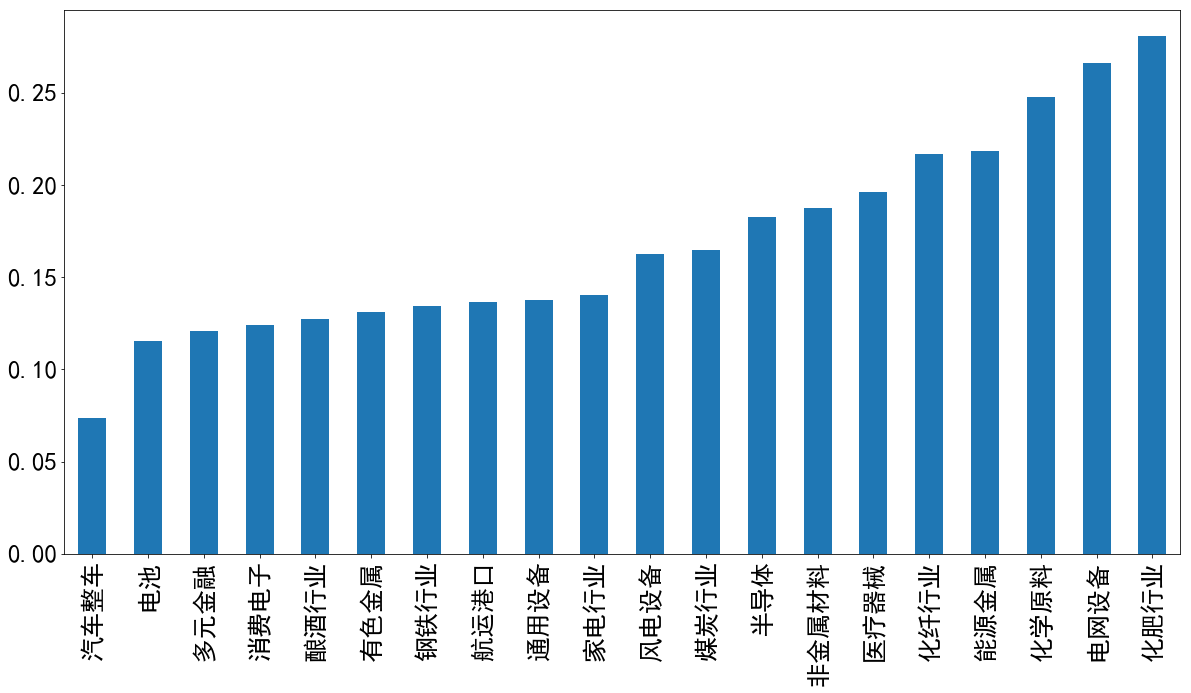

In [32]:
compare_data['净资产收益率'].plot(kind='bar', figsize=(20,10), fontsize=25)

In [33]:
col = '利润率'
compare_data = pd.concat([pd.DataFrame(industry_df.loc["汽车整车"]).T,industry_df.drop("汽车整车").sort_values(by=col).tail(compare_num-1)])
compare_data

,净资产收益率,利润率,资产周转率,权益乘数
汽车整车,0.073824,-0.053234,0.716960,4.468725
煤炭行业,0.164657,0.111829,0.739661,2.713523
美容护理,0.030004,0.112043,0.727539,1.493302
电子元件,-0.462707,0.117456,0.763931,1.598190
风电设备,0.162604,0.123210,0.608290,2.591287
航天航空,0.043866,0.135594,0.422078,2.877988
水泥建材,0.085934,0.138494,0.637316,2.181069
公用事业,0.043269,0.143169,0.317450,4.490858
化学原料,0.247401,0.157054,0.866476,1.827665
仪器仪表,-0.106646,0.166461,0.526867,1.256721


In [35]:
# 比亚迪股票代码
code = '002594.SZ'
report_date = '2022-12-31 00:00:00'
total_lrb_df_index_dropdu.loc[report_date].loc[code]

股票简称             比亚迪
行业名称            汽车整车
营业收入     4.24061e+11
营业成本     3.51816e+11
销售费用     1.50607e+10
管理费用     1.00074e+10
财务费用    -1.61796e+09
营业总支出    4.01187e+11
营业利润     2.15418e+10
利润总额     2.10797e+10
所得税费用    3.36662e+09
净利润      1.77131e+10
Name: 002594.SZ, dtype: object

In [36]:
total_zcfz_df_index_dropdu.loc[report_date].loc[code]

股票简称             比亚迪
行业名称            汽车整车
总资产      4.93861e+11
固定资产      1.3188e+11
货币资金     5.14713e+10
应收账款     3.88285e+10
存货       7.91072e+10
总负债      3.72471e+11
应付账款     1.40437e+11
预收账款             NaN
所有者权益     1.2139e+11
同期资产      2.9578e+11
同期权益     1.04244e+11
Name: 002594.SZ, dtype: object

In [37]:
# 广汽集团股票代码
code = '601238.SH'
report_date = '2022-12-31 00:00:00'
total_lrb_df_index_dropdu.loc[report_date].loc[code]

股票简称            广汽集团
行业名称            汽车整车
营业收入     1.10006e+11
营业成本     1.01689e+11
销售费用     4.22846e+09
管理费用      4.1678e+09
财务费用    -1.80925e+08
营业总支出    1.13954e+11
营业利润     7.45557e+09
利润总额     7.46251e+09
所得税费用    -5.3554e+08
净利润      7.99805e+09
Name: 601238.SH, dtype: object

In [38]:
total_zcfz_df_index_dropdu.loc[report_date].loc[code]

股票简称            广汽集团
行业名称            汽车整车
总资产      1.90021e+11
固定资产     1.92835e+10
货币资金     3.95244e+10
应收账款     8.40805e+09
存货       1.23618e+10
总负债      6.77725e+10
应付账款     1.68935e+10
预收账款             NaN
所有者权益    1.22248e+11
同期资产     1.54197e+11
同期权益     9.25948e+10
Name: 601238.SH, dtype: object